# Stroke Prediction Neural Network

Initial try at implementing a Neural Network on the stroke prediction dataset.

### Preliminaries 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing
from sklearn.compose import ColumnTransformer #data preprocessing
from tensorflow.keras import layers, models #neural network architecture
from tensorflow.keras.callbacks import EarlyStopping #regularization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras #keras
import tensorflow as tf #tensorflow
from sklearn.metrics import accuracy_score, recall_score ,precision_score, f1_score#evaluate model


### Data Import 

In [12]:
train_feats = pd.read_csv('../Xin/Data/X_train.csv')
train_feats.head()

,Unnamed: 0,level_0,index,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked
0,0,3262,3263,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
1,1,3267,3268,2.0,0,0,99.75,16.0,0,1,0,0,0,0,0,0,0,0
2,2,1407,1407,77.0,0,0,100.85,29.5,0,1,1,0,0,1,0,0,0,0
3,3,1385,1385,45.0,0,0,89.05,27.8,0,1,1,0,0,1,0,1,1,0
4,4,3600,3601,27.0,0,0,82.05,21.0,0,1,0,0,0,1,0,1,0,0


In [14]:
train_feats = train_feats.drop(['Unnamed: 0', 'level_0' ,'index'], axis=1)
train_feats.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked
0,75.0,1,0,91.85,21.4,0,1,0,0,0,0,1,0,1,0
1,2.0,0,0,99.75,16.0,0,1,0,0,0,0,0,0,0,0
2,77.0,0,0,100.85,29.5,0,1,1,0,0,1,0,0,0,0
3,45.0,0,0,89.05,27.8,0,1,1,0,0,1,0,1,1,0
4,27.0,0,0,82.05,21.0,0,1,0,0,0,1,0,1,0,0


In [31]:
train_resp = pd.read_csv('../Xin/Data/Y_train.csv')
train_resp.head()

,Unnamed: 0,index,stroke
0,0,3262,0
1,1,3267,0
2,2,1407,0
3,3,1385,0
4,4,3600,0


In [32]:
train_resp = train_resp.drop(['Unnamed: 0', 'index'], axis=1)
train_resp.head()

,stroke
0,0
1,0
2,0
3,0
4,0


In [30]:
print('Samples in Train Set:', len(train_feats))

Samples in Train Set: 4087


### Pre-processing

In [40]:
#Scale Numeric Variables
num_ix = [0, 3, 4] #index of numeric variables
num_ct = ColumnTransformer([
    ('num_vars', StandardScaler(), num_ix)
], remainder='passthrough')
train_feats = num_ct.fit_transform(train_feats)

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

### Plotting activation functions

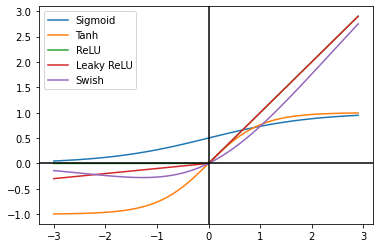

In [25]:
# Sigmoid Function
def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a
# Hyperbolic Tanjant Function
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)
# ReLU Function
def re(x):
    b = []
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
    return b
# Leaky ReLU Function
def lr(x):
    b = []
    for i in x:
        if i<0:
            b.append(i/10)
        else:
            b.append(i)
    return b
  
# Determining the intervals to be created for the graph
x = np.arange(-3., 3., 0.1)
sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
leaky_relu = lr(x)
swish = sig*x

# Displaying the functions
line_1, = plt.plot(x,sig, label='Sigmoid')
line_2, = plt.plot(x,tanh, label='Tanh')
line_3, = plt.plot(x,relu, label='ReLU')
line_4, = plt.plot(x,leaky_relu, label='Leaky ReLU')
line_5, = plt.plot(x,swish, label='Swish')
plt.legend(handles=[line_1, line_2, line_3, line_4, line_5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

### NN

In [41]:
!pip install wandb
!wandb login

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.



  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=0e734a7314384eaf8296836d56c3fa193956cf6f7f5bbf2a972c1d08a10b4271
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b7\0a\67\ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9


wandb: ERROR Find detailed error logs at: C:\Users\user\AppData\Local\Temp\debug-cli.user.log
Error: api_key not configured (no-tty). call wandb login [your_api_key]


In [42]:
from wandb.keras import WandbCallback

### Relu

In [47]:
inputs = keras.Input(shape=(15,))
a = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.6)(a)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.concatenate([a, x])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.6)(x)
output = layers.Dense(1, activation='sigmoid')(x)

nn = keras.Model(inputs, output, name="stroke_predictor")
nn.summary()

Model: "stroke_predictor"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 64)           1024        ['input_2[0][0]']                
                                                                                                  
 dropout_6 (Dropout)            (None, 64)           0           ['dense_7[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 128)          8320        ['dropout_6[0][0]']              
                                                                                   

In [48]:
#compiles the model with Adam optimizer
nn.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy', metrics=['accuracy'])
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Make a validation set and change this 

#Trains the neural network
history = nn.fit(train_feats, train_resp, epochs=10, callbacks=[early_stopper], verbose=0)

### Import and preprocess test data

In [50]:
test_feats = pd.read_csv('../Xin/Data/X_test.csv')
test_feats = test_feats.drop(['Unnamed: 0', 'level_0' ,'index'], axis=1)
print('Samples in Test Set:', len(test_feats))

Samples in Test Set: 1022


In [51]:
#Scale Numeric Variables

test_feats = num_ct.fit_transform(test_feats)

In [52]:
test_resp = pd.read_csv('../Xin/Data/Y_test.csv')
test_resp = test_resp.drop(['Unnamed: 0', 'index'], axis=1)

### Predictions with NN

In [53]:
#Display the metrics of the neural network on the test set
test_preds = nn.predict(test_feats)
threshold = 0.25
test_preds = [1. if i > threshold else 0. for i in test_preds]
test_acc = accuracy_score(test_resp, test_preds)
test_rec = recall_score(test_resp, test_preds)
test_pre = precision_score(test_resp, test_preds)
print('Test Set Metrics')
print('Model Accuracy:', test_acc)
print('Model Recall:', test_rec)
print('Model Precision:', test_pre)

32/32 [==============================] - 1s 3ms/step
Test Set Metrics
Model Accuracy: 0.9569471624266145
Model Recall: 0.41818181818181815
Model Precision: 0.6571428571428571


### References 
1. https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a